# Carte de l'ensoleillement annuel moyen en France par départements 

L'objectif de ce document est à la fois de se familisariser avec les fonds de carte et la génération de cartes, et de visualiser une donnée qui peut être pertinente pour notre étude : la carte de l'ensoleillement moyen annuel par département en France. 

In [89]:
import pandas as pd
import geopandas as gpd
!pip install geoviews
import geoviews as gv

  Using cached geoviews-1.11.0-py2.py3-none-any.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.2/511.2 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 7.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 12.8 MB/s eta 0:00:00


In [9]:
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 11.0 MB/s eta 0:00:0000:01
  Cloning https://github.com/inseefrlab/cartiflette (to revision 80b8a5a28371feb6df31d55bcc2617948a5f9b1a) to /tmp/pip-req-build-ewin_0h0
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartiflette /tmp/pip-req-build-ewin_0h0
  Running command git rev-parse -q --verify 'sha^80b8a5a28371feb6df31d55bcc2

In [82]:
url_soleil='https://static.data.gouv.fr/resources/donnees-du-temps-densoleillement-par-departements-en-france/20221207-142648/temps-densoleillement-par-an-par-departement-feuille-1.csv'
ensoleillement=pd.read_csv(url_soleil)
ensoleillement=ensoleillement.rename(columns={'Départements' : 'Départements',"Temps d'enseillement (jours/an)": "Temps d'ensoleillement (jours/an)"})
ensoleillement

,Départements,Temps d'ensoleillement (jours/an)
0,Ain,182
1,Aisne,142
2,Allier,161
3,Alpes de Haute Provence,241
4,Hautes-Alpes,232
...,...,...
88,Essonne,148
89,Hauts-de-Seine,107
90,Seine-Saint-Denis,126
91,Val-de-Marne,126


In [25]:
import cartiflette.s3 as s3

dep = s3.download_vectorfile_url_all(
    values = "metropole",
    crs = 4326,
    borders = "DEPARTEMENT",
    vectorfile_format="topojson",
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022)

dep["area"] = dep.to_crs(2154).area

https://minio.lab.sspcloud.fr/projet-cartiflette/diffusion/shapefiles-test1/year=2022/administrative_level=DEPARTEMENT/crs=4326/FRANCE_ENTIERE=metropole/vectorfile_format=topojson/provider=IGN/source=EXPRESS-COG-CARTO-TERRITOIRE/raw.topojson


Downloading: : 7.17MiB [00:00, 61.4MiB/s]


In [76]:
dep

,id,ID,NOM_M,NOM,INSEE_DEP,INSEE_REG,source,territoire,geometry,area
0,DEPARTEM_FXX_00000000001,NaN,AIN,Ain,01,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09
1,DEPARTEM_FXX_00000000002,NaN,AISNE,Aisne,02,32,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09
2,DEPARTEM_FXX_00000000003,NaN,CORSE-DU-SUD,Corse-du-Sud,2A,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((8.59803 41.88006, 8.59803 41.8...",4.033539e+09
3,DEPARTEM_FXX_00000000004,NaN,HAUTE-CORSE,Haute-Corse,2B,94,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"MULTIPOLYGON (((9.40793 43.02585, 9.40793 43.0...",4.720673e+09
4,DEPARTEM_FXX_00000000005,NaN,ALLIER,Allier,03,84,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09
...,...,...,...,...,...,...,...,...,...,...
91,DEPARTEM_FXX_00000000092,NaN,ESSONNE,Essonne,91,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.22904 48.77049, 2.22918 48.77049, ...",1.818530e+09
92,DEPARTEM_FXX_00000000093,NaN,HAUTS-DE-SEINE,Hauts-de-Seine,92,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.29093 48.95097, 2.29152 48.95077, ...",1.755648e+08
93,DEPARTEM_FXX_00000000094,NaN,SEINE-SAINT-DENIS,Seine-Saint-Denis,93,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.55350 49.01018, 2.55350 49.01009, ...",2.368666e+08
94,DEPARTEM_FXX_00000000095,NaN,VAL-DE-MARNE,Val-de-Marne,94,11,IGN:EXPRESS-COG-CARTO-TERRITOIRE,metropole,"POLYGON ((2.33195 48.81702, 2.33209 48.81702, ...",2.448138e+08


In [85]:
soleil=dep.merge(ensoleillement, left_on='NOM', right_on='Départements')[['NOM','geometry', 'area', "Temps d'ensoleillement (jours/an)"]]
soleil

,NOM,geometry,area,Temps d'ensoleillement (jours/an)
0,Ain,"POLYGON ((5.00939 46.50701, 5.00924 46.50701, ...",5.774291e+09,182
1,Aisne,"POLYGON ((3.07070 49.76692, 3.07055 49.76692, ...",7.418552e+09,142
2,Allier,"POLYGON ((2.56379 46.53199, 2.56379 46.53189, ...",7.365673e+09,161
3,Hautes-Alpes,"POLYGON ((6.26063 45.12680, 6.26284 45.12651, ...",5.684990e+09,232
4,Alpes-Maritimes,"MULTIPOLYGON (((7.05128 43.49938, 7.05128 43.4...",4.294694e+09,253
...,...,...,...,...
83,Essonne,"POLYGON ((2.22904 48.77049, 2.22918 48.77049, ...",1.818530e+09,148
84,Hauts-de-Seine,"POLYGON ((2.29093 48.95097, 2.29152 48.95077, ...",1.755648e+08,107
85,Seine-Saint-Denis,"POLYGON ((2.55350 49.01018, 2.55350 49.01009, ...",2.368666e+08,126
86,Val-de-Marne,"POLYGON ((2.33195 48.81702, 2.33209 48.81702, ...",2.448138e+08,126


In [101]:
from geoviews import dim
regions = gv.Polygons(soleil, vdims=['NOM', "Temps d'ensoleillement (jours/an)"])
regions.opts(width=600, height=600, toolbar='above', color=dim("Temps d'ensoleillement (jours/an)"), colorbar=True, tools=['hover'], aspect='equal')

:Polygons   [Longitude,Latitude]   (NOM,Temps d'ensoleillement (jours/an))

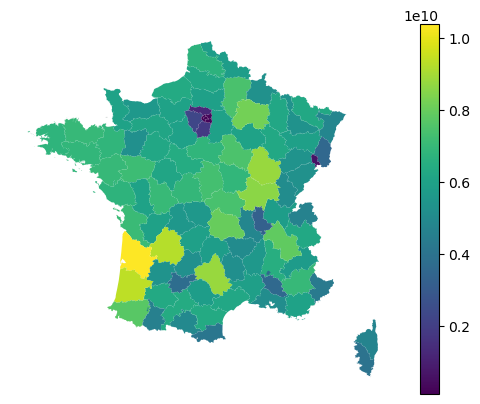

In [104]:
ax = dep.plot(column = "area",legend='True')
ax.set_axis_off()